In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import janitor
import zipfile
import missingno as msno
from sklearn.linear_model import LinearRegression

## Preparing Dataset and Quick Cleaning

In [2]:
!kaggle datasets download -d girumwondemagegn/dataset-for-renewable-energy-systems

100%|████████████████████████████████████████| 853k/853k [00:08<00:00, 98.5kB/s]
100%|████████████████████████████████████████| 853k/853k [00:08<00:00, 98.5kB/s]


In [3]:
with zipfile.ZipFile("./dataset-for-renewable-energy-systems.zip", "r") as enzip:
    enzip.extractall(path = "./raw_data")

In [4]:
!rm -rf "./dataset-for-renewable-energy-systems.zip"

In [5]:
en_rawdf = pd.read_csv("./raw_data/energy_dataset_.csv", encoding="utf-8", header=0, sep=",")
en_rawdf.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583


In [6]:
print(f"Size is {en_rawdf.size}, with {en_rawdf.shape[0]} rows and {en_rawdf.shape[1]} columns")

Size is 195000, with 15000 rows and 13 columns


In [7]:
en_rawdf.columns # (Task) describe more details about it

Index(['Type_of_Renewable_Energy', 'Installed_Capacity_MW',
       'Energy_Production_MWh', 'Energy_Consumption_MWh',
       'Energy_Storage_Capacity_MWh', 'Storage_Efficiency_Percentage',
       'Grid_Integration_Level', 'Initial_Investment_USD', 'Funding_Sources',
       'Financial_Incentives_USD', 'GHG_Emission_Reduction_tCO2e',
       'Air_Pollution_Reduction_Index', 'Jobs_Created'],
      dtype='object')

In [8]:
en_rawdf.dtypes # we don't have categorical, but let's delve into it, if there's an encoding from numerical to categorical.

Type_of_Renewable_Energy           int64
Installed_Capacity_MW            float64
Energy_Production_MWh            float64
Energy_Consumption_MWh           float64
Energy_Storage_Capacity_MWh      float64
Storage_Efficiency_Percentage    float64
Grid_Integration_Level             int64
Initial_Investment_USD           float64
Funding_Sources                    int64
Financial_Incentives_USD         float64
GHG_Emission_Reduction_tCO2e     float64
Air_Pollution_Reduction_Index    float64
Jobs_Created                       int64
dtype: object

In [9]:
en_rawdf.describe() # Type of Renewable and Grid Integration could describe categorical 

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,3.973933,495.855747,252350.955621,225981.854966,5030.196472,75.219334,2.501267,2.514849e+08,2.004000,1.002977e+07,25234.722158,50.724179,2502.668600
std,1.999380,288.212872,144062.915425,129223.677997,2894.096326,14.485289,1.123306,1.432843e+08,0.817493,5.787303e+06,14378.915277,28.556578,1451.212661
min,1.000000,1.091767,1030.103692,584.048006,2.200208,50.003494,1.000000,1.008107e+06,1.000000,5.155842e+04,100.974460,1.009712,10.000000
25%,2.000000,245.475737,128568.875900,115587.428225,2543.341380,62.694076,1.000000,1.259709e+08,1.000000,4.963454e+06,12754.476927,26.224426,1228.000000
50%,4.000000,492.907555,253216.871250,225226.374350,5054.036248,75.279702,3.000000,2.539910e+08,2.000000,1.002414e+07,25424.477000,50.250207,2496.000000
75%,6.000000,742.254682,377083.805575,338656.214700,7536.935405,87.754318,4.000000,3.759130e+08,3.000000,1.507417e+07,37750.426285,75.720133,3765.000000
max,7.000000,999.982979,499991.200400,449922.667800,9999.145037,99.994955,4.000000,4.999407e+08,3.000000,1.999855e+07,49997.578530,99.980494,4999.000000


In [10]:
en_rawdf.Type_of_Renewable_Energy # This can make reference to a categorical type of renewable energy (so we have to read in documentation)

0        4
1        4
2        1
3        1
4        3
        ..
14995    3
14996    1
14997    3
14998    7
14999    3
Name: Type_of_Renewable_Energy, Length: 15000, dtype: int64

In [11]:
en_rawdf.Type_of_Renewable_Energy = (
    en_rawdf.Type_of_Renewable_Energy
    .replace(
        {
            1 : "Solar",
            2 : "Wind",
            3 : "Hydroelectric",
            4 : "Geothermal", 
            5 : "Biomass",
            6 : "Tidal",
            7 : "Wave"
        }
         
    )
)

In [12]:
en_rawdf.Grid_Integration_Level =  (
    en_rawdf.Grid_Integration_Level
    .replace(
        {
            1 : "Fully Integrated",
            2 : "Partially Integrated",
            3 : "Minimal Integration",
            4 : "Isolated Microgrid"
        }
    )
)

In [13]:
en_rawdf.Funding_Sources =  (
    en_rawdf.Funding_Sources
    .replace(
        {
            1 : "Government",
            2 : "Private",
            3 : "Public-private partnership"
        }
    )
)

In [14]:
en_rawdf.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,Geothermal,93.423205,103853.2206,248708.4892,2953.248771,89.887562,Isolated Microgrid,4.732248e+08,Government,9.207772e+06,6663.816572,81.742461,1366
1,Geothermal,590.468942,190223.0649,166104.1642,5305.174042,84.403343,Isolated Microgrid,1.670697e+08,Private,1.685101e+06,30656.049820,78.139042,1743
2,Solar,625.951142,266023.4824,424114.6308,2620.192622,60.498249,Partially Integrated,8.463610e+07,Private,5.111813e+06,1749.613759,8.461296,363
3,Solar,779.998728,487039.5296,308337.7316,1925.250307,86.897861,Minimal Integration,3.967690e+08,Private,4.805902e+06,43233.237820,8.402441,2821
4,Hydroelectric,242.106837,482815.0856,360437.7705,3948.945383,70.949351,Partially Integrated,3.574413e+07,Government,1.668601e+07,14858.662760,28.822867,2583


## Finding Missing Values

In [15]:
print(f"Total missing values: {en_rawdf.isna().sum().sum()}")

Total missing values: 0


#### Inspecting `.describe()`

In [16]:
en_rawdf.describe() # So far, all figures are consistent

,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Initial_Investment_USD,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000
mean,495.855747,252350.955621,225981.854966,5030.196472,75.219334,2.514849e+08,1.002977e+07,25234.722158,50.724179,2502.668600
std,288.212872,144062.915425,129223.677997,2894.096326,14.485289,1.432843e+08,5.787303e+06,14378.915277,28.556578,1451.212661
min,1.091767,1030.103692,584.048006,2.200208,50.003494,1.008107e+06,5.155842e+04,100.974460,1.009712,10.000000
25%,245.475737,128568.875900,115587.428225,2543.341380,62.694076,1.259709e+08,4.963454e+06,12754.476927,26.224426,1228.000000
50%,492.907555,253216.871250,225226.374350,5054.036248,75.279702,2.539910e+08,1.002414e+07,25424.477000,50.250207,2496.000000
75%,742.254682,377083.805575,338656.214700,7536.935405,87.754318,3.759130e+08,1.507417e+07,37750.426285,75.720133,3765.000000
max,999.982979,499991.200400,449922.667800,9999.145037,99.994955,4.999407e+08,1.999855e+07,49997.578530,99.980494,4999.000000


In [17]:
en_df = (
    en_rawdf
    .dropna()
    .clean_names(case_type = "snake")
)

---

## Finding relationships

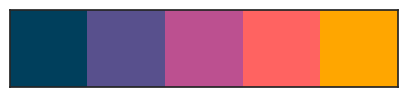

In [28]:
colors = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]
sns.palplot(sns.color_palette(colors))

In [38]:
sns.set_theme(context = "notebook", style = "dark")
sns.set_palette(colors)

In [39]:
en_df_corr = en_df.corr(numeric_only=True)
en_df_corr

,installed_capacity_mw,energy_production_m_wh,energy_consumption_m_wh,energy_storage_capacity_m_wh,storage_efficiency_percentage,initial_investment_usd,financial_incentives_usd,ghg_emission_reduction_t_co2e,air_pollution_reduction_index,jobs_created
installed_capacity_mw,1.000000,-0.011518,0.006653,0.011497,0.000459,0.006481,0.003406,0.013794,-0.007509,-0.001333
energy_production_m_wh,-0.011518,1.000000,-0.000375,-0.004192,0.000240,-0.006079,0.001275,-0.004152,-0.007794,-0.002318
energy_consumption_m_wh,0.006653,-0.000375,1.000000,-0.001221,0.006057,-0.021515,0.010666,0.010215,0.002989,0.009949
energy_storage_capacity_m_wh,0.011497,-0.004192,-0.001221,1.000000,0.010302,0.002807,0.014154,-0.001749,-0.006083,0.000961
storage_efficiency_percentage,0.000459,0.000240,0.006057,0.010302,1.000000,0.003805,0.000276,0.006632,0.000773,0.009559
initial_investment_usd,0.006481,-0.006079,-0.021515,0.002807,0.003805,1.000000,0.002219,-0.011007,-0.001793,-0.002253
financial_incentives_usd,0.003406,0.001275,0.010666,0.014154,0.000276,0.002219,1.000000,0.003741,-0.004103,-0.016718
ghg_emission_reduction_t_co2e,0.013794,-0.004152,0.010215,-0.001749,0.006632,-0.011007,0.003741,1.000000,-0.010273,0.001217
air_pollution_reduction_index,-0.007509,-0.007794,0.002989,-0.006083,0.000773,-0.001793,-0.004103,-0.010273,1.000000,0.004543
jobs_created,-0.001333,-0.002318,0.009949,0.000961,0.009559,-0.002253,-0.016718,0.001217,0.004543,1.000000


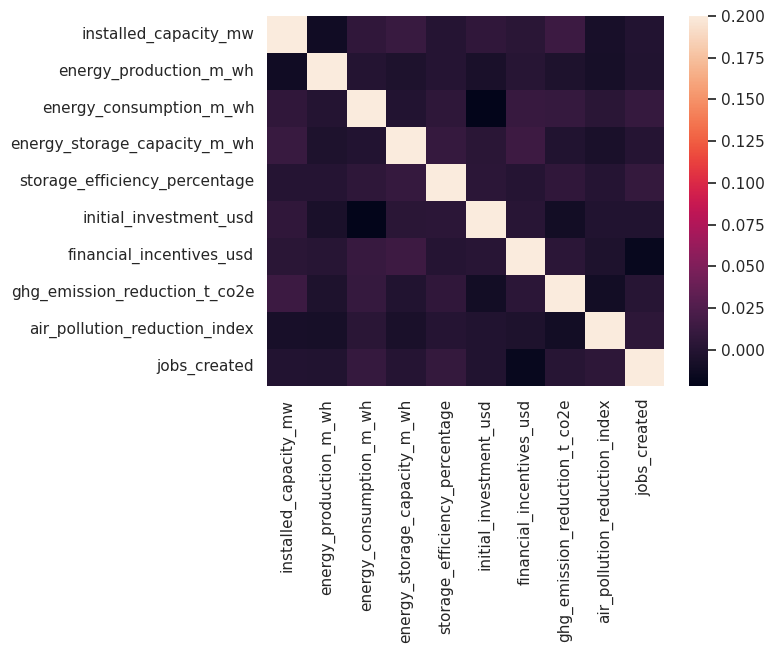

In [40]:
sns.heatmap(data = en_df_corr, cbar = True, annot = False, vmax = 0.2); # Poor correlations

Finding fonts in my system

In [42]:
from matplotlib import font_manager

In [43]:
font_dirs = ["/home/fenilenvinileno97/fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

In [44]:
font1 = {"family" : "serif", "size" : 20}
font2 = {"family" : "serif", "size" : 12}

## `Categorical`
### 1. _Relevant variables by type of renewable energy_

In [41]:
en_df.columns
# installed_capacity_mw, initial_investment_usd, ghg_emission_reduction_tco2e, air_pollution, jobs_created vs type

Index(['type_of_renewable_energy', 'installed_capacity_mw',
       'energy_production_m_wh', 'energy_consumption_m_wh',
       'energy_storage_capacity_m_wh', 'storage_efficiency_percentage',
       'grid_integration_level', 'initial_investment_usd', 'funding_sources',
       'financial_incentives_usd', 'ghg_emission_reduction_t_co2e',
       'air_pollution_reduction_index', 'jobs_created'],
      dtype='object')

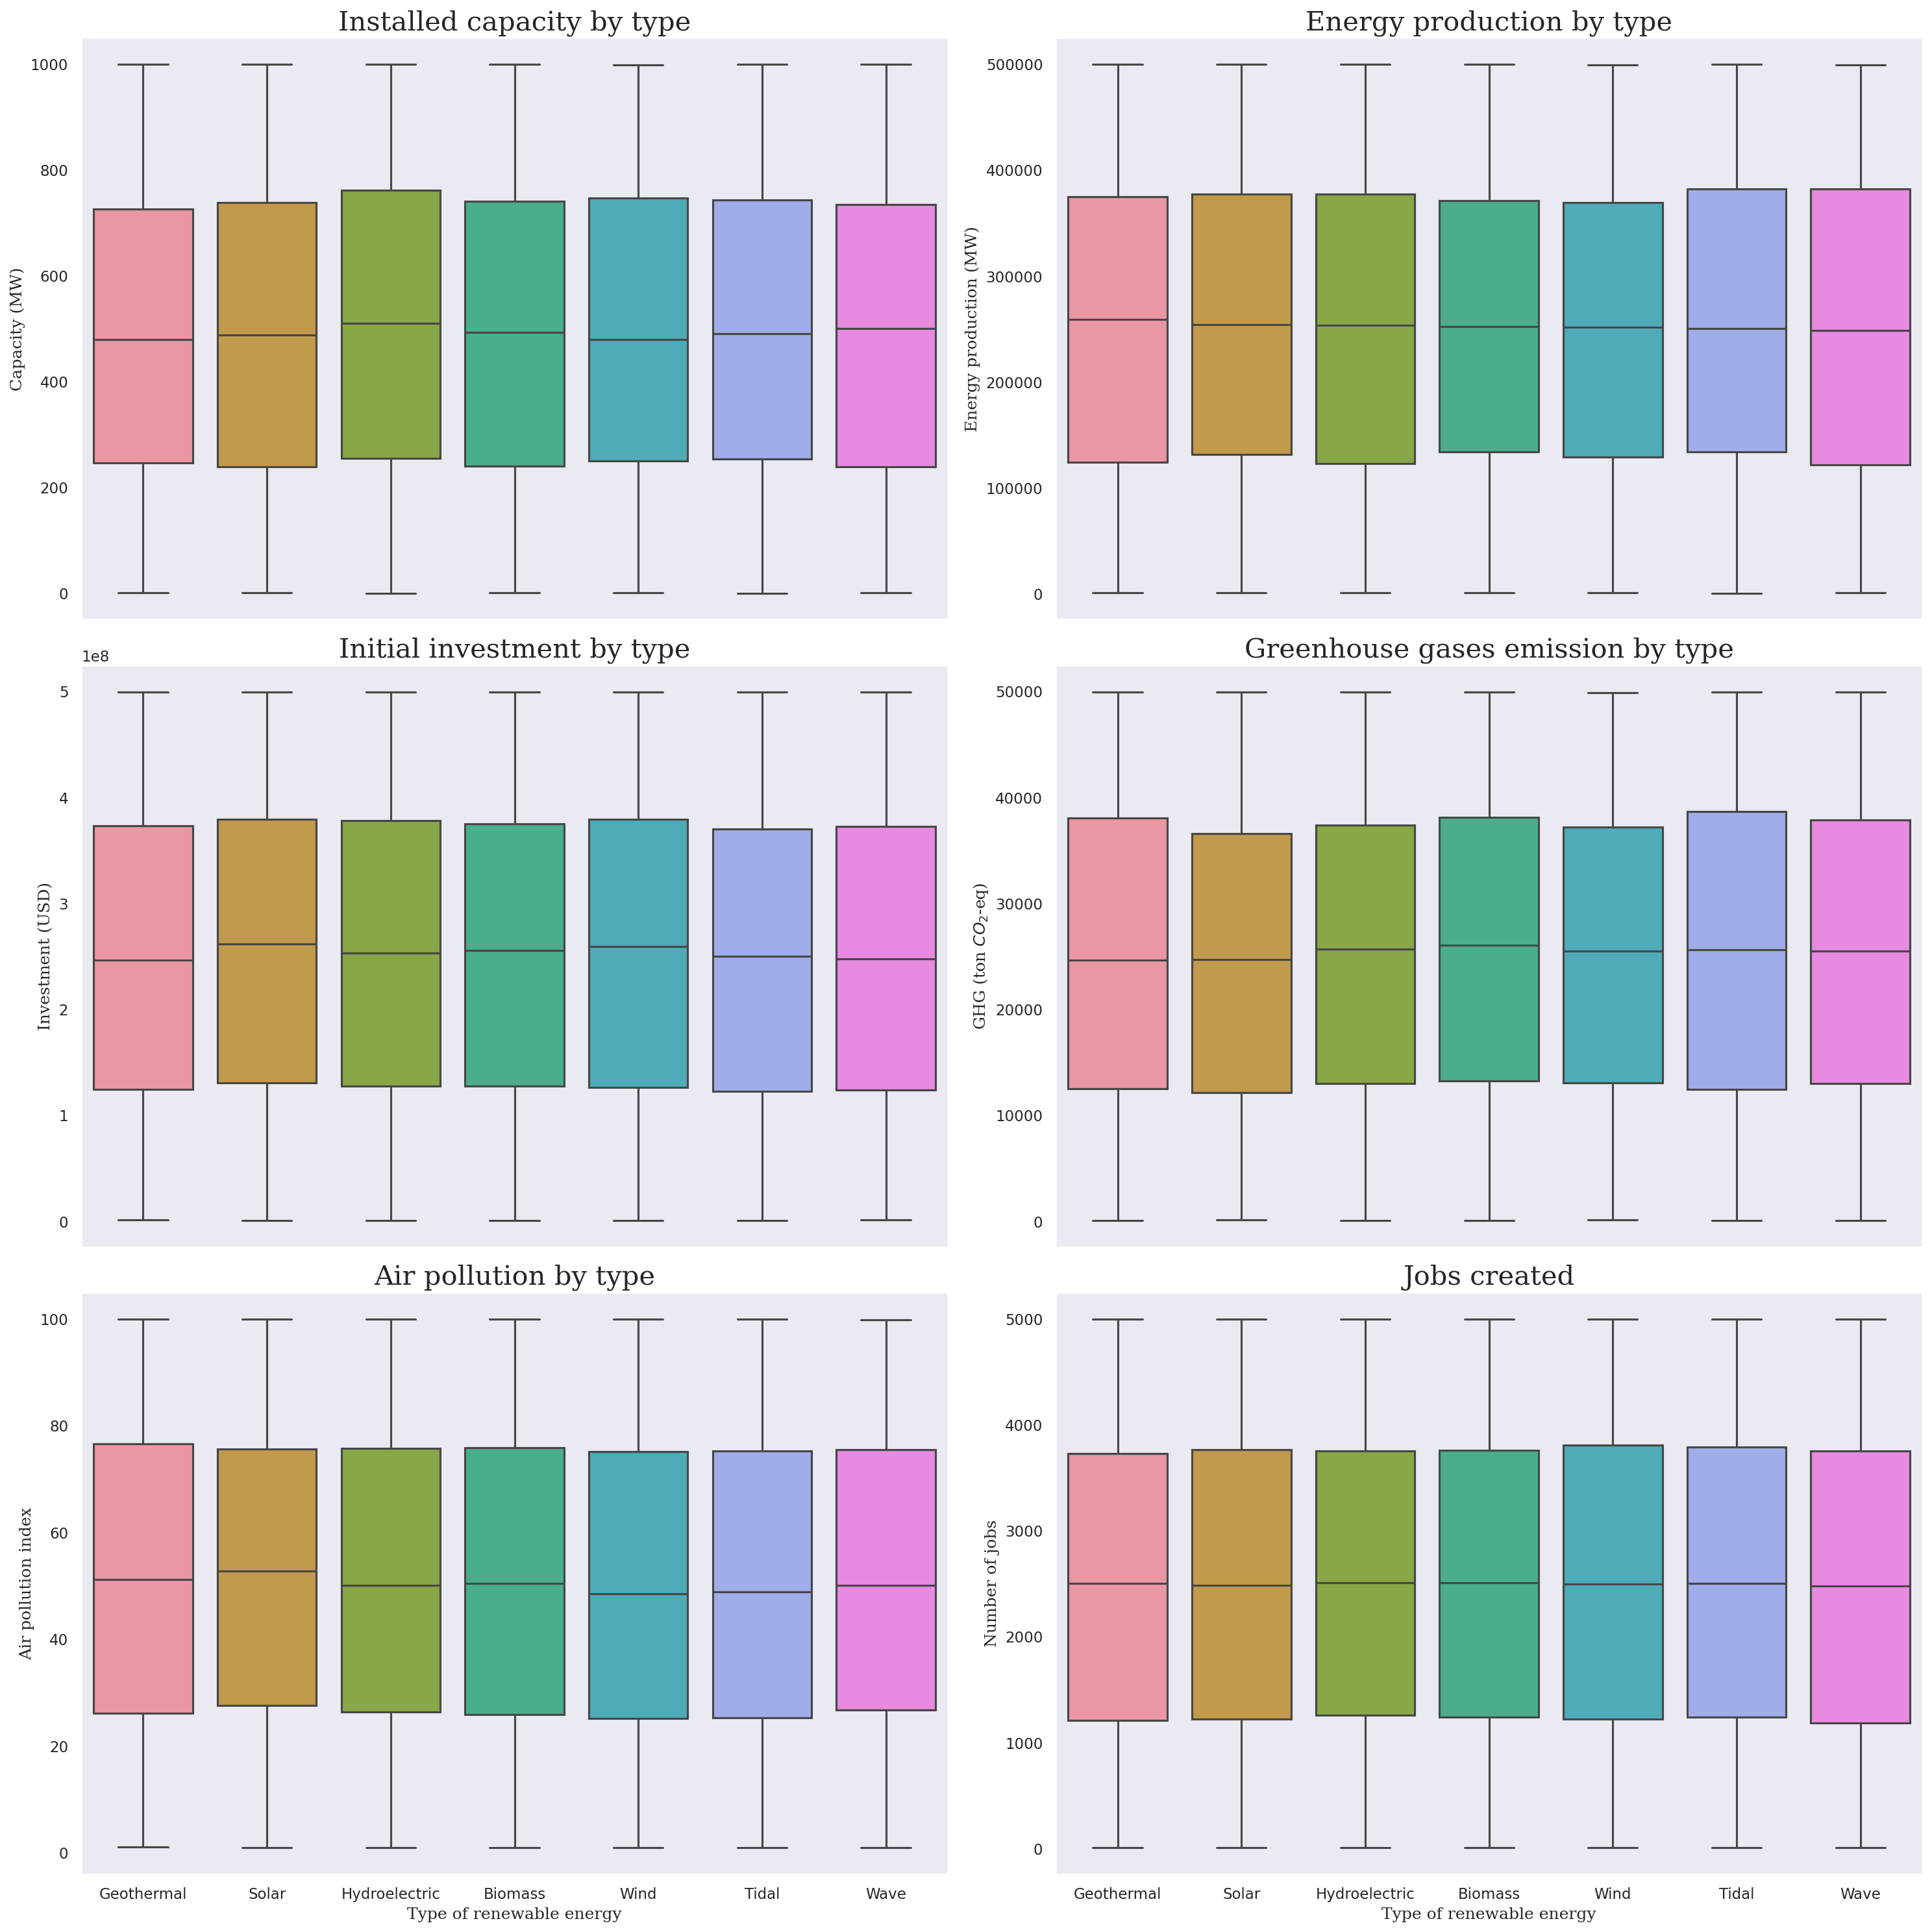

In [45]:
fig, axes = plt.subplots(
    nrows = 3,
    ncols = 2,
    sharex = True,
    sharey = False,
    figsize = (20, 20),
    dpi = 150
)
sns.boxplot(data=en_df, y="installed_capacity_mw", x="type_of_renewable_energy", ax=axes.flat[0])
axes.flat[0].set_title("Installed capacity by type", fontdict=font1)
axes.flat[0].set_xlabel("")
axes.flat[0].set_ylabel("Capacity (MW)", fontdict=font2)

sns.boxplot(data=en_df, y="energy_production_m_wh", x="type_of_renewable_energy", ax=axes.flat[1])
axes.flat[1].set_title("Energy production by type", fontdict=font1)
axes.flat[1].set_xlabel("")
axes.flat[1].set_ylabel("Energy production (MW)", fontdict=font2)

sns.boxplot(data=en_df, y="initial_investment_usd", x="type_of_renewable_energy", ax=axes.flat[2])
axes.flat[2].set_title("Initial investment by type", fontdict=font1)
axes.flat[2].set_xlabel("")
axes.flat[2].set_ylabel("Investment (USD)", fontdict=font2)

sns.boxplot(data=en_df, y="ghg_emission_reduction_t_co2e", x="type_of_renewable_energy", ax=axes.flat[3])
axes.flat[3].set_title("Greenhouse gases emission by type", fontdict=font1)
axes.flat[3].set_xlabel("")
axes.flat[3].set_ylabel(r"GHG (ton $CO_{2}$-eq)", fontdict=font2)

sns.boxplot(data=en_df, y="air_pollution_reduction_index", x="type_of_renewable_energy", ax=axes.flat[4])
axes.flat[4].set_title("Air pollution by type", fontdict=font1)
axes.flat[4].set_xlabel("Type of renewable energy", fontdict=font2)
axes.flat[4].set_ylabel("Air pollution index", fontdict=font2)

sns.boxplot(data=en_df, y="jobs_created", x="type_of_renewable_energy", ax=axes.flat[5])
axes.flat[5].set_title("Jobs created", fontdict=font1)
axes.flat[5].set_xlabel("Type of renewable energy", fontdict=font2)
axes.flat[5].set_ylabel("Number of jobs", fontdict=font2)

plt.tight_layout()

### 2. _Relevant variables by grid integration level_

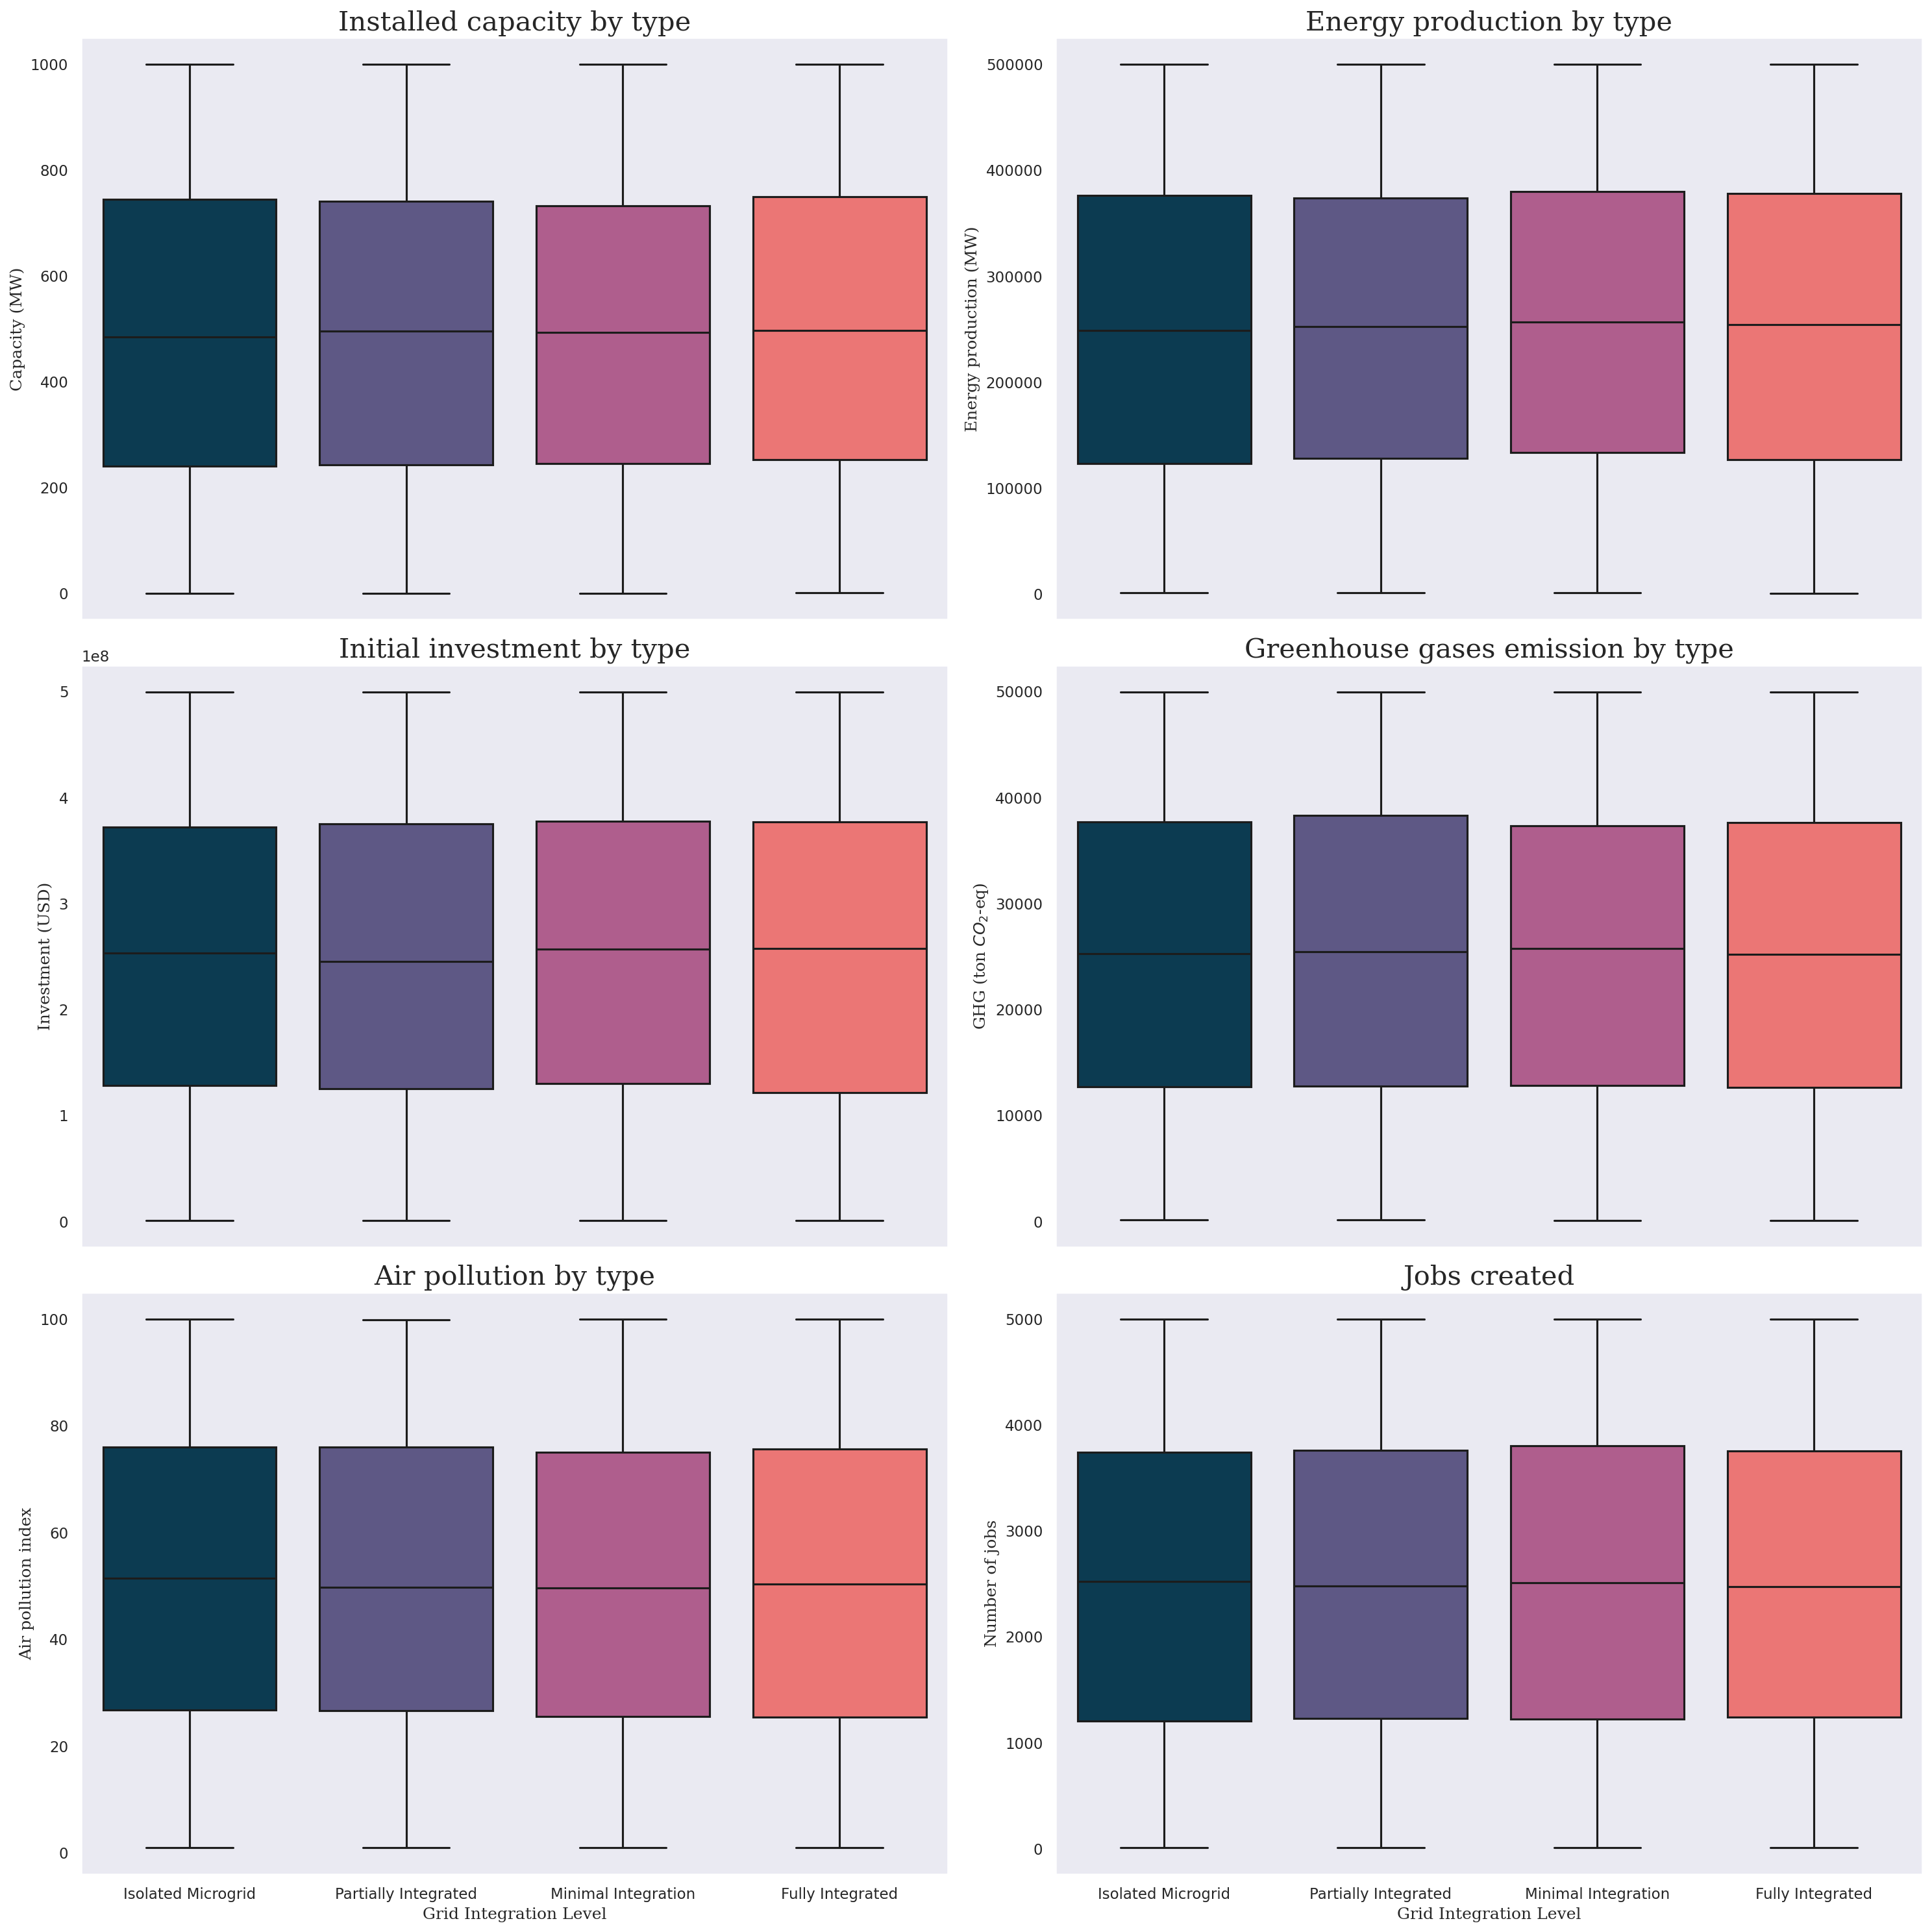

In [48]:
fig, axes = plt.subplots(
    nrows = 3,
    ncols = 2,
    sharex = True,
    sharey = False,
    figsize = (20, 20),
    dpi = 150
)
sns.boxplot(data=en_df, y="installed_capacity_mw", x="grid_integration_level", ax=axes.flat[0])
axes.flat[0].set_title("Installed capacity by type", fontdict=font1)
axes.flat[0].set_xlabel("")
axes.flat[0].set_ylabel("Capacity (MW)", fontdict=font2)

sns.boxplot(data=en_df, y="energy_production_m_wh", x="grid_integration_level", ax=axes.flat[1])
axes.flat[1].set_title("Energy production by type", fontdict=font1)
axes.flat[1].set_xlabel("")
axes.flat[1].set_ylabel("Energy production (MW)", fontdict=font2)

sns.boxplot(data=en_df, y="initial_investment_usd", x="grid_integration_level", ax=axes.flat[2])
axes.flat[2].set_title("Initial investment by type", fontdict=font1)
axes.flat[2].set_xlabel("")
axes.flat[2].set_ylabel("Investment (USD)", fontdict=font2)

sns.boxplot(data=en_df, y="ghg_emission_reduction_t_co2e", x="grid_integration_level", ax=axes.flat[3])
axes.flat[3].set_title("Greenhouse gases emission by type", fontdict=font1)
axes.flat[3].set_xlabel("")
axes.flat[3].set_ylabel(r"GHG (ton $CO_{2}$-eq)", fontdict=font2)

sns.boxplot(data=en_df, y="air_pollution_reduction_index", x="grid_integration_level", ax=axes.flat[4])
axes.flat[4].set_title("Air pollution by type", fontdict=font1)
axes.flat[4].set_xlabel("Grid Integration Level", fontdict=font2)
axes.flat[4].set_ylabel("Air pollution index", fontdict=font2)

sns.boxplot(data=en_df, y="jobs_created", x="grid_integration_level", ax=axes.flat[5])
axes.flat[5].set_title("Jobs created", fontdict=font1)
axes.flat[5].set_xlabel("Grid Integration Level", fontdict=font2)
axes.flat[5].set_ylabel("Number of jobs", fontdict=font2)

plt.tight_layout()

### 3. _Relevant variables by funding sources_

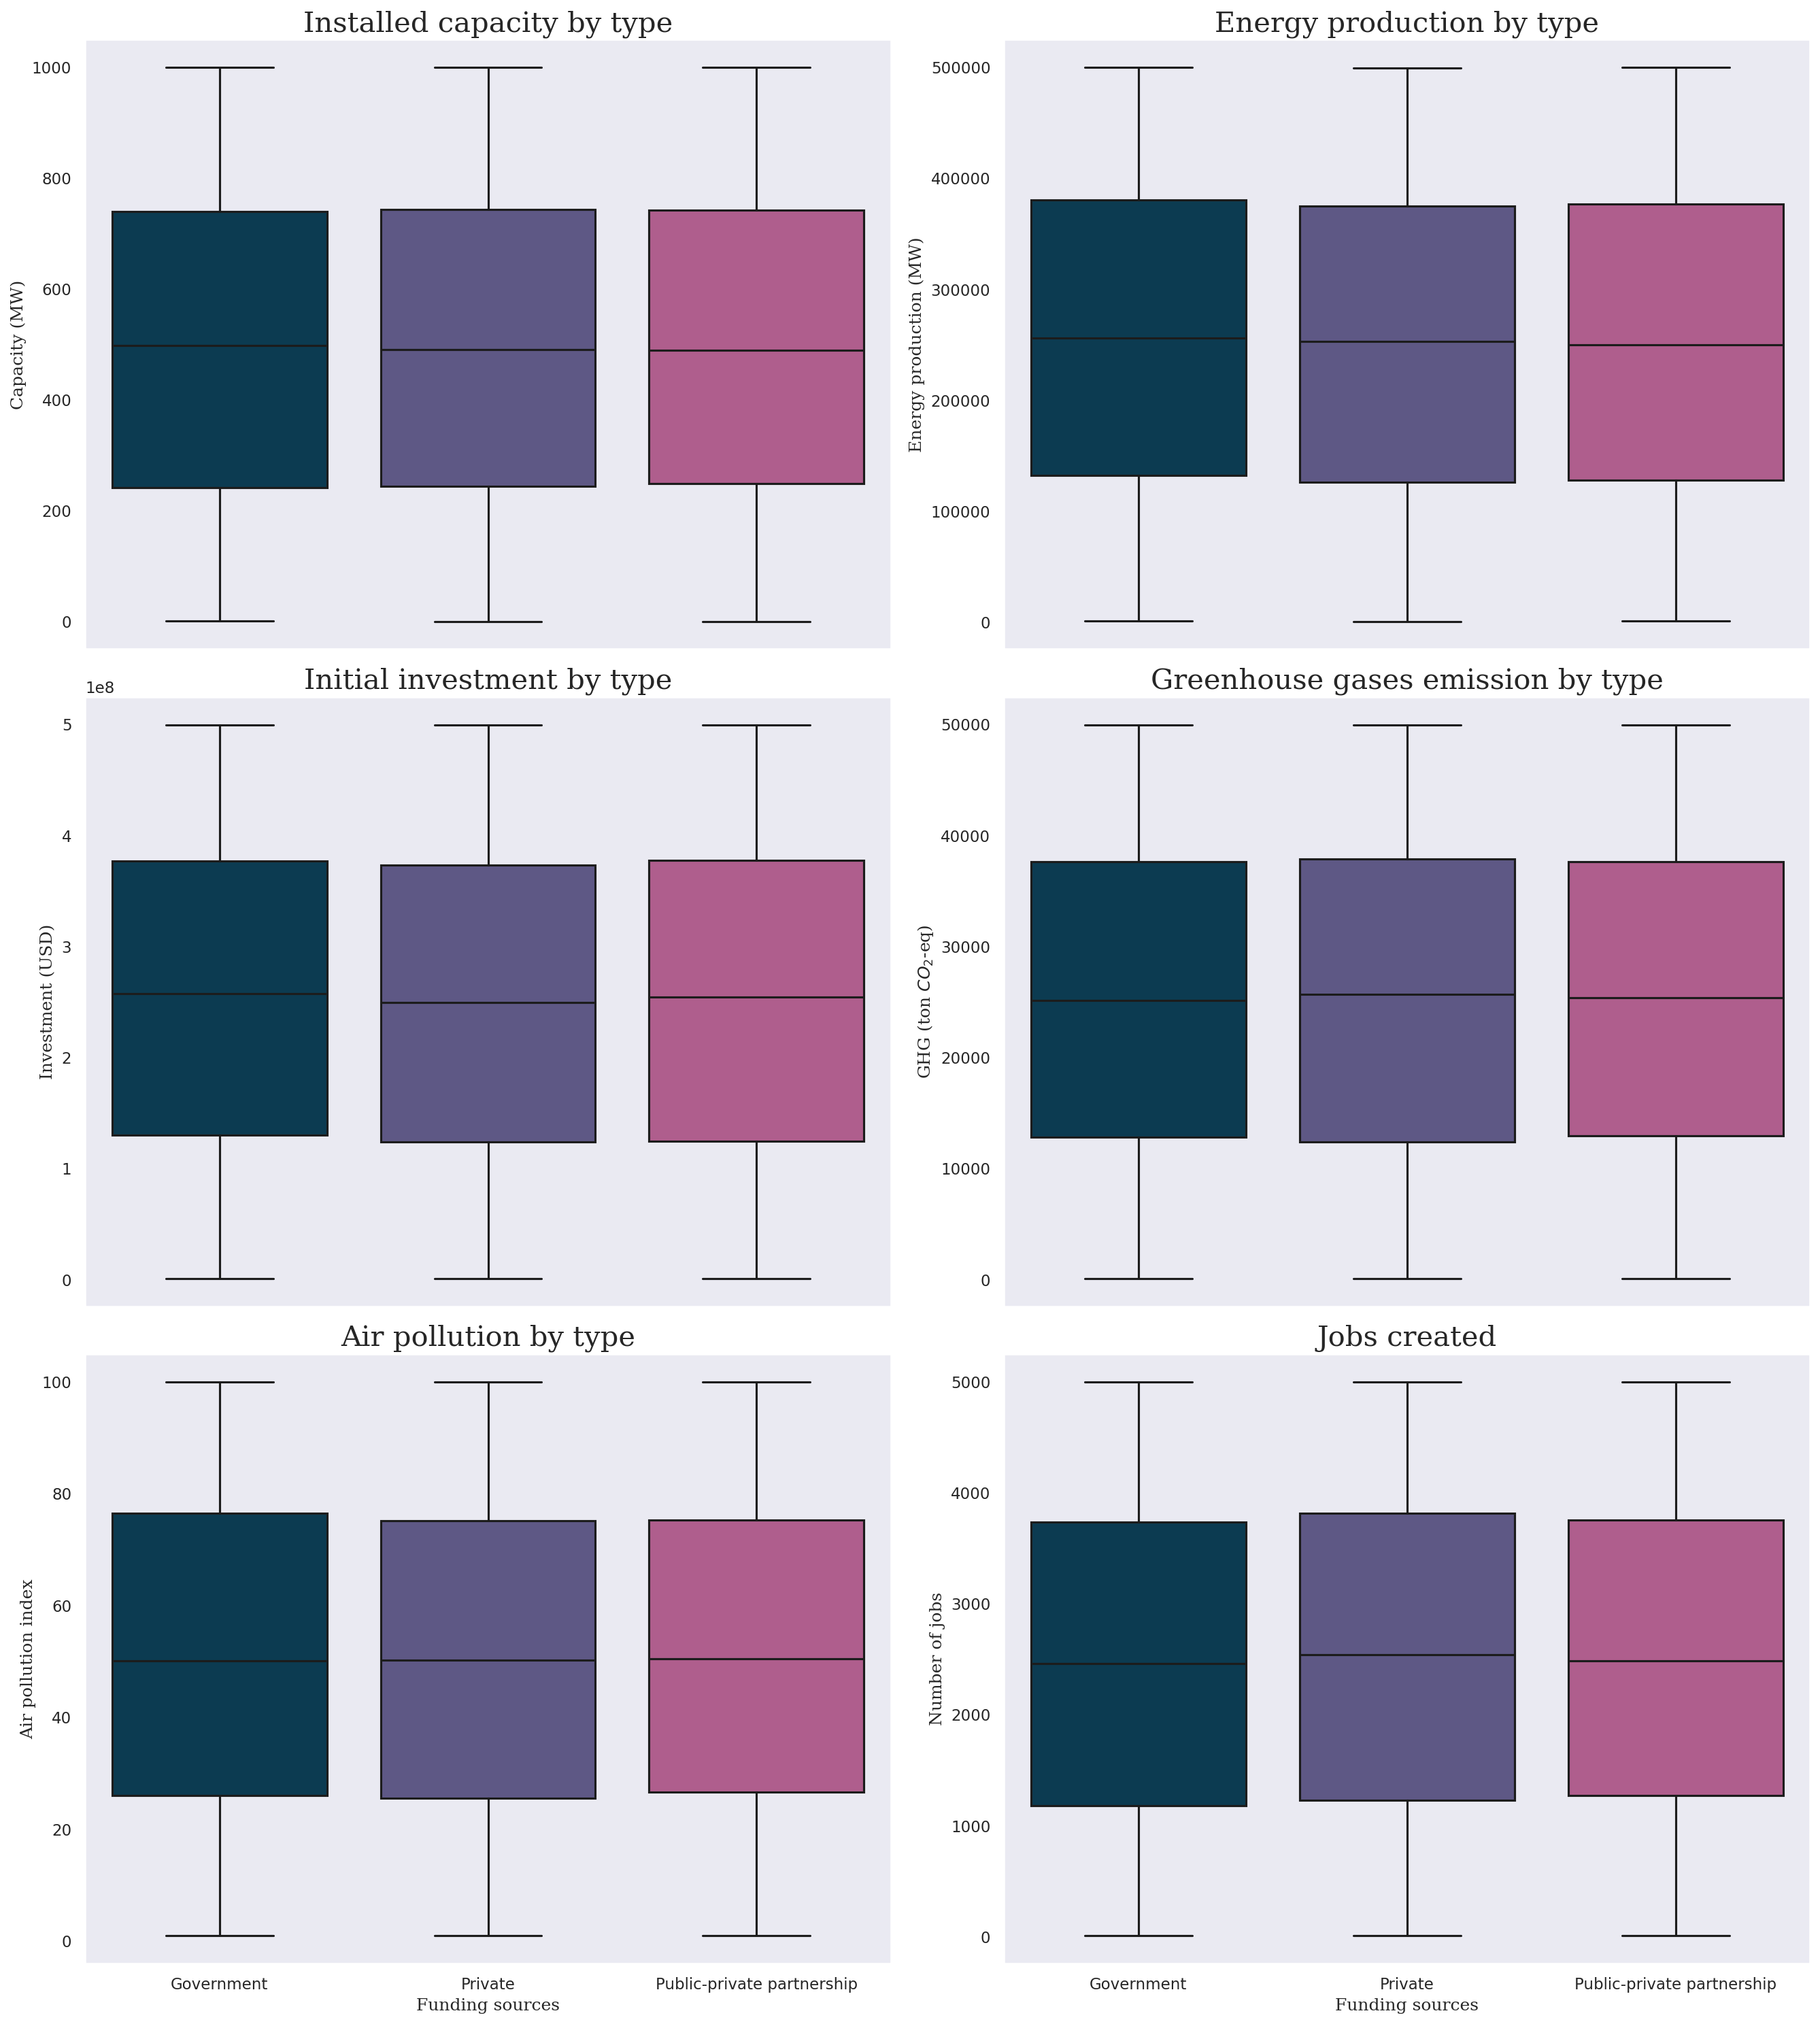

In [52]:
fig, axes = plt.subplots(
    nrows = 3,
    ncols = 2,
    sharex = True,
    sharey = False,
    figsize = (18, 20),
    dpi = 150
)
sns.boxplot(data=en_df, y="installed_capacity_mw", x="funding_sources", ax=axes.flat[0])
axes.flat[0].set_title("Installed capacity by type", fontdict=font1)
axes.flat[0].set_xlabel("")
axes.flat[0].set_ylabel("Capacity (MW)", fontdict=font2)

sns.boxplot(data=en_df, y="energy_production_m_wh", x="funding_sources", ax=axes.flat[1])
axes.flat[1].set_title("Energy production by type", fontdict=font1)
axes.flat[1].set_xlabel("")
axes.flat[1].set_ylabel("Energy production (MW)", fontdict=font2)

sns.boxplot(data=en_df, y="initial_investment_usd", x="funding_sources", ax=axes.flat[2])
axes.flat[2].set_title("Initial investment by type", fontdict=font1)
axes.flat[2].set_xlabel("")
axes.flat[2].set_ylabel("Investment (USD)", fontdict=font2)

sns.boxplot(data=en_df, y="ghg_emission_reduction_t_co2e", x="funding_sources", ax=axes.flat[3])
axes.flat[3].set_title("Greenhouse gases emission by type", fontdict=font1)
axes.flat[3].set_xlabel("")
axes.flat[3].set_ylabel(r"GHG (ton $CO_{2}$-eq)", fontdict=font2)

sns.boxplot(data=en_df, y="air_pollution_reduction_index", x="funding_sources", ax=axes.flat[4])
axes.flat[4].set_title("Air pollution by type", fontdict=font1)
axes.flat[4].set_xlabel("Funding sources", fontdict=font2)
axes.flat[4].set_ylabel("Air pollution index", fontdict=font2)

sns.boxplot(data=en_df, y="jobs_created", x="funding_sources", ax=axes.flat[5])
axes.flat[5].set_title("Jobs created", fontdict=font1)
axes.flat[5].set_xlabel("Funding sources", fontdict=font2)
axes.flat[5].set_ylabel("Number of jobs", fontdict=font2)

plt.tight_layout()

## `Distribution`

### 1. _Number of jobs_

In [102]:
en_df.columns

Index(['type_of_renewable_energy', 'installed_capacity_mw',
       'energy_production_m_wh', 'energy_consumption_m_wh',
       'energy_storage_capacity_m_wh', 'storage_efficiency_percentage',
       'grid_integration_level', 'initial_investment_usd', 'funding_sources',
       'financial_incentives_usd', 'ghg_emission_reduction_t_co2e',
       'air_pollution_reduction_index', 'jobs_created'],
      dtype='object')

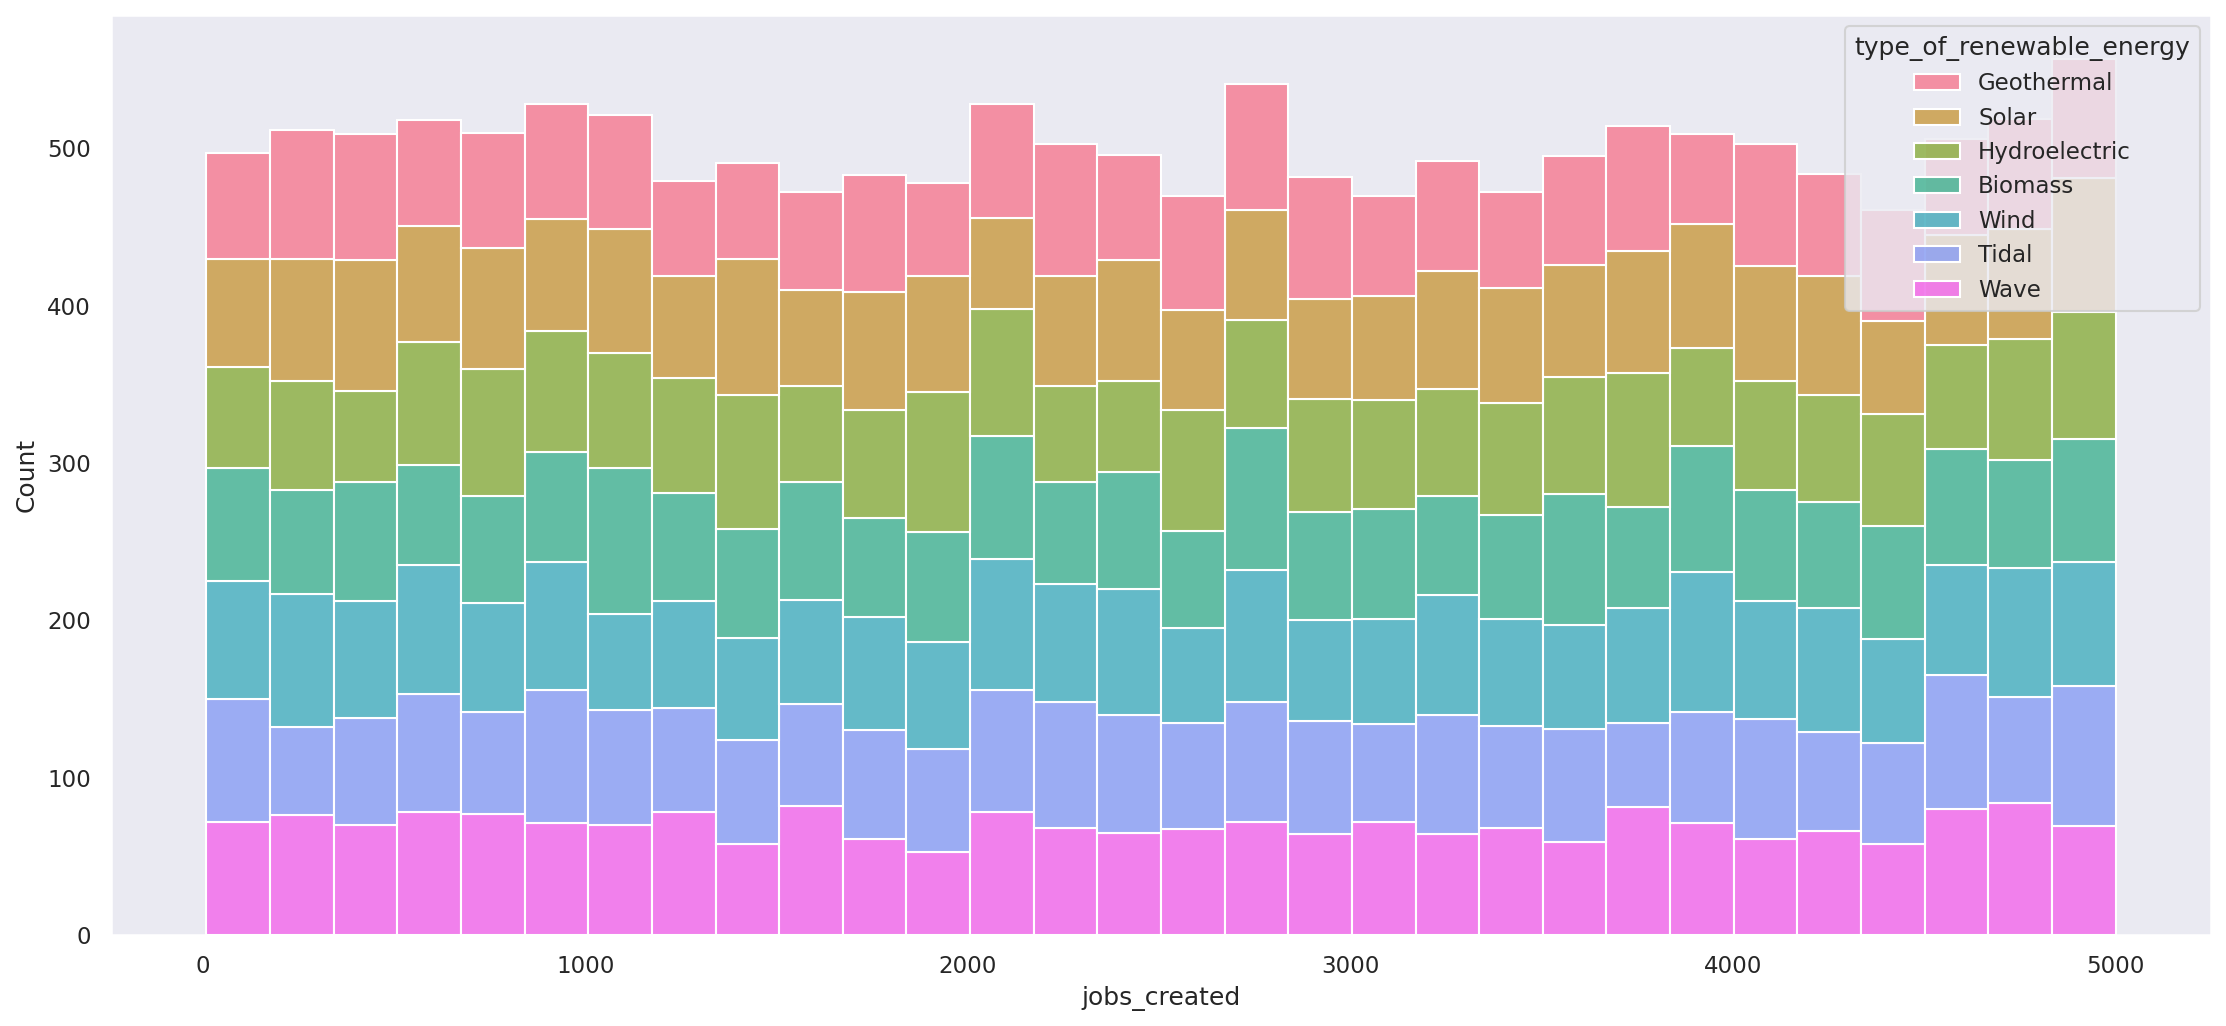

In [103]:
fig, axito = plt.subplots(1, 1, figsize=(15,7), dpi=150)
sns.histplot(data=en_df, x="jobs_created", hue="type_of_renewable_energy", bins=30, multiple="stack", ax=axito, legend=True)
# plt.legend() ##do this!
plt.tight_layout();